In [2]:
import polars as pl
import pybaseball as pb
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import polars.selectors as cs

In [3]:
pb.cache.enable()

### Get Pitcher Information

In [4]:
(pitcher_data := pb.playerid_lookup('Skubal', 'Tarik')
)

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,skubal,tarik,669373,skubt001,skubata01,22267,2020.0,2025.0


#### Generalize the Process

In [5]:
(player_id := pitcher_data['key_mlbam'][0])

(start_year := int(pitcher_data['mlb_played_first'][0]))

(end_year := int(pitcher_data['mlb_played_last'][0]))


2025

### Grab the Data and combine

In [6]:
years = range(start_year, end_year + 1)

# Collect yearly data into a list
dfs = []
for y in years:
    print(f"Fetching {y} data...")
    try:
        df_year = pb.statcast_pitcher(f"{y}-01-01", f"{y}-12-31", player_id)
        if not df_year.empty:
            dfs.append(pl.from_pandas(df_year))
    except Exception as e:
        print(f"No data for {y}: {e}")

# Combine all years into one Polars DataFrame
if dfs:
    all_pitches = pl.concat(dfs, how="vertical_relaxed")
    print(f"\nCombined dataset shape: {all_pitches.shape}")
    print("Columns:", all_pitches.columns)
else:
    print("No data found for this player.")
    

Fetching 2020 data...
Fetching 2021 data...
Fetching 2022 data...
Fetching 2023 data...
Fetching 2024 data...
Fetching 2025 data...

Combined dataset shape: (13619, 118)
Columns: ['pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fi

In [7]:
all_pitches

pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,…,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
str,str,f64,f64,f64,str,i64,i64,str,str,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,…,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SL""","""2020-09-27""",85.1,2.98,6.29,"""Skubal, Tarik""",521692,669373,"""strikeout""","""called_strike""",null,null,null,null,1.0,"""Salvador Perez called out on s…","""R""","""R""","""L""","""KC""","""DET""","""S""",2.0,null,2,2,2020,-0.17,0.06,-0.49,3.18,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",206.0,-0.01,-0.25,null,null,null,0.25,null,1,1,0.702,0.702,23,30,24,30,2,2,5.0,1.0,null,null,3.09,-0.17,0.17,47.9,null,null,null,null,null
"""FF""","""2020-09-27""",94.4,3.23,6.32,"""Skubal, Tarik""",521692,669373,null,"""ball""",null,null,null,null,12.0,"""Ball""","""R""","""R""","""L""","""KC""","""DET""","""B""",null,null,1,2,2020,1.14,1.65,1.62,2.98,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",136.0,0.002,0.046,null,null,null,-0.046,null,1,1,0.7,0.7,23,30,24,30,2,2,5.0,1.0,null,null,0.94,1.14,-1.14,43.1,null,null,null,null,null
"""FF""","""2020-09-27""",93.6,2.98,6.35,"""Skubal, Tarik""",521692,669373,null,"""foul""",null,null,null,null,12.0,"""Foul""","""R""","""R""","""L""","""KC""","""DET""","""S""",null,null,1,1,2020,1.0,1.34,1.37,2.92,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",141.0,-0.002,-0.075,null,null,null,0.075,null,1,1,0.702,0.702,23,30,24,30,2,2,5.0,1.0,null,null,1.29,1.0,-1.0,46.0,null,null,null,null,null
"""FF""","""2020-09-27""",93.1,2.96,6.39,"""Skubal, Tarik""",521692,669373,null,"""swinging_strike""",null,null,null,null,12.0,"""Swinging Strike""","""R""","""R""","""L""","""KC""","""DET""","""S""",null,null,1,0,2020,0.91,1.64,1.44,2.99,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",140.0,-0.002,-0.057,null,null,null,0.057,null,1,1,0.704,0.704,23,30,24,30,2,2,5.0,1.0,null,null,1.0,0.91,-0.91,47.6,null,null,null,null,null
"""CU""","""2020-09-27""",76.4,2.71,6.52,"""Skubal, Tarik""",521692,669373,null,"""ball""",null,null,null,null,14.0,"""Ball""","""R""","""R""","""L""","""KC""","""DET""","""B""",null,null,0,0,2020,-0.26,-1.32,0.06,-1.13,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",339.0,0.001,0.046,null,null,null,-0.046,null,1,1,0.703,0.703,23,30,24,30,2,2,5.0,1.0,null,null,5.23,-0.26,0.26,58.0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""SI""","""2025-02-26""",97.6,1.48,6.43,"""Skubal, Tarik""",681508,669373,"""field_out""","""hit_into_play""",null,null,null,null,4.0,"""Mickey Gasper grounds out, sho…","""S""","""R""","""L""","""DET""","""MIN""","""X""",6.0,"""ground_ball""",0,1,20

In [8]:
(
    all_pitches_features := all_pitches
    .drop([cs.contains('_deprecated')])
    .select([cs.float() | cs.contains('pitch_type')])
)


pitch_type,release_speed,release_pos_x,release_pos_z,spin_dir,zone,hit_location,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,hc_x,hc_y,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_win_exp,bat_win_exp,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SL""",85.1,2.98,6.29,null,1.0,2.0,-0.17,0.06,-0.49,3.18,null,null,null,null,null,null,null,-7.782973,-123.721016,-1.107625,-0.173032,24.393207,-31.523368,3.55,1.7,null,null,null,84.9,1483.0,6.2,54.35,null,0.0,0.0,1.0,0.0,0.0,null,206.0,-0.01,-0.25,null,null,null,0.25,null,0.702,0.702,5.0,1.0,null,null,3.09,-0.17,0.17,47.9,null,null,null,null,null
"""FF""",94.4,3.23,6.32,null,12.0,null,1.14,1.65,1.62,2.98,null,null,null,null,null,null,null,-6.675962,-137.055987,-6.557067,15.899447,33.809779,-10.094797,3.62,1.67,null,null,null,93.3,2385.0,6.0,54.49,null,null,null,null,null,null,null,136.0,0.002,0.046,null,null,null,-0.046,null,0.7,0.7,5.0,1.0,null,null,0.94,1.14,-1.14,43.1,null,null,null,null,null
"""FF""",93.6,2.98,6.35,null,12.0,null,1.0,1.34,1.37,2.92,null,null,null,null,null,null,null,-6.308548,-136.007089,-5.991313,13.823252,32.572721,-14.435085,3.49,1.6,null,null,null,92.8,2251.0,6.1,54.39,null,null,null,null,null,null,null,141.0,-0.002,-0.075,null,null,null,0.075,null,0.702,0.702,5.0,1.0,null,null,1.29,1.0,-1.0,46.0,null,null,null,null,null
"""FF""",93.1,2.96,6.39,null,12.0,null,0.91,1.64,1.44,2.99,null,null,null,null,null,null,null,-5.88301,-135.353033,-6.501201,12.509075,30.776896,-10.758048,3.49,1.6,null,null,null,92.6,2279.0,6.1,54.39,null,null,null,null,null,null,null,140.0,-0.002,-0.057,null,null,null,0.057,null,0.704,0.704,5.0,1.0,null,null,1.0,0.91,-0.91,47.6,null,null,null,null,null
"""CU""",76.4,2.71,6.52,null,14.0,null,-0.26,-1.32,0.06,-1.13,null,null,null,null,null,null,null,-5.115604,-111.105537,-6.662703,-1.18712,20.428366,-42.032835,3.53,1.7,null,null,null,76.1,2287.0,6.2,54.34,null,null,null,null,null,null,null,339.0,0.001,0.046,null,null,null,-0.046,null,0.703,0.703,5.0,1.0,null,null,5.23,-0.26,0.26,58.0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""SI""",97.6,1.48,6.43,null,4.0,6.0,1.25,1.03,-0.45,2.62,null,null,null,108.92,160.12,null,null,-8.04057,-141.734046,-7.024608,18.701143,34.484398,-16.863967,3.11,1.57,8.0,96.3,-19.0,97.1,2264.0,6.2,54.26,0.119,null,0.0,null,0.0,0.0,2.0,156.0,0.014,-0.215,null,null,0.119,0.215,96.3,0.524,0.476,null,null,null,null,1.39,1.25,-1.25,null,null,null,null,null,null
"""SL""",90.5,1.45,6.47,null,1.0,null,-0.54,0.18,-0.34,2.81,null,null,null,null,null,null,null,-3.305729,-131.88612,-3.625158,-5.68019,26.750358,-29.487406,3.11,1.57,null,null,null,null,2321.0,null,54.13,null,null,null,null,null,null,null,191.0,0.002,-0.039,null,null,null,0.039,null,0.522,0.478,null,null,null,null,2.58,-0.54,0.54,null,null,null,null,null,null
"""SI""",96.6,1.64,6.32,null,2.0,1.0,0.97,1.17,0.22,3.27,null,null,null,125.86,186.14,null,null,-6.165748,-140.462599,-5.346952,14.20712,33.675477,-15.633672,3.23,1.63,8.0,81.1,-22.0,99.1,2191.0,7.8,52.67,0.053,null,0.0,null,0

In [14]:
# unwanted cols
exclude_cols = [
    'spin_dir', 'hit_location', 'on_3b', 'on_2b', 'on_1b', 'hc_x', 'hc_y', 'umpire', 'sv_id',
    'hit_distance_sc', 'launch_speed', 'launch_angle', 'estimated_ba_using_speedangle',
    'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'iso_value',
    'launch_speed_angle', 'bat_speed', 'swing_length', 'estimated_slg_using_speedangle',
    'hyper_speed', 'pitcher_days_since_prev_game', 'batter_days_since_prev_game',
    'pitcher_days_until_next_game', 'batter_days_until_next_game', 'arm_angle', 'attack_angle',
    'attack_direction', 'swing_path_tilt', 'intercept_ball_minus_batter_pos_x_inches',
    'intercept_ball_minus_batter_pos_y_inches', 'delta_home_win_exp', 'delta_run_exp', 
    'delta_pitcher_run_exp', 'home_win_exp', 'bat_win_exp'
]

# get cols of interest
cols = all_pitches_features.columns
columns_of_interest = [col for col in cols if col not in exclude_cols]

# complete data frame
(Skubal_All := all_pitches_features
 .select(columns_of_interest)
)

# features data frame
(Skubal_Features_only := all_pitches_features
 .select(columns_of_interest)
 .drop(pl.col('pitch_type'))
 ).describe()


statistic,release_speed,release_pos_x,release_pos_z,zone,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13447.0,13413.0,13414.0,13422.0,13447.0,13414.0,13447.0,13447.0,13447.0
"""null_count""",172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,206.0,205.0,197.0,172.0,205.0,172.0,172.0,172.0
"""mean""",91.205042,2.129876,6.225524,8.510672,0.611101,0.84907,0.038615,2.425109,-6.581048,-132.582711,-5.464977,8.894505,28.190681,-20.41702,3.37932,1.581013,91.19915,2077.749366,6.319602,54.180503,158.24057,1.932509,0.611101,-0.404409
"""std""",5.925115,0.571854,0.184044,4.242853,0.59571,0.582324,0.737418,0.973818,2.441863,8.579237,2.539572,7.116014,4.230422,7.525041,0.175968,0.100559,5.984049,271.693022,0.173309,0.171322,45.998654,0.936922,0.59571,0.751521
"""min""",69.7,1.01,5.7,1.0,-1.25,-1.64,-3.85,-2.39,-16.141672,-148.852315,-15.860797,-10.550233,14.700635,-45.158173,2.64,1.14,68.6,81.0,5.1,52.67,1.0,0.61,-1.25,-1.8
"""25%""",87.1,1.68,6.09,5.0,0.14,0.51,-0.44,1.81,-8.192286,-139.686936,-7.158917,2.976351,24.920674,-25.906233,3.26,1.51,87.1,1976.0,6.2,54.07,139.0,1.19,0.14,-1.04
"""50%""",93.0,1.94,6.21,9.0,0.69,0.97,0.04,2.45,-6.526154,-135.086266,-5.597322,10.074582,28.454986,-19.230101,3.38,1.58,92.8,2139.0,6.3,54.19,146.0,1.62,0.69,-0.53
"""75%""",96.1,2.57,6.35,12.0,1.13,1.31,0.53,3.09,-4.91813,-126.567558,-3.969623,14.811041,31.388833,-13.99991,3.49,1.64,96.1,2251.0,6.4,54.3,155.0,2.49,1.13,0.12
"""max""",102.6,3.66,6.95,14.0,1.8,1.9,2.71,5.88,2.359192,-101.027454,7.368898,25.944555,57.667987,-6.269972,4.14,1.98,102.6,3411.0,7.8,55.43,359.0,6.22,1.8,1.72


In [15]:
columns_of_interest


['pitch_type',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'zone',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'release_pos_y',
 'spin_axis',
 'api_break_z_with_gravity',
 'api_break_x_arm',
 'api_break_x_batter_in']

In [16]:
Skubal_Features_only.drop_nulls()
# only 216 or 1.6% are nulls, just going to leave those out for analysis.

release_speed,release_pos_x,release_pos_z,zone,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
85.1,2.98,6.29,1.0,-0.17,0.06,-0.49,3.18,-7.782973,-123.721016,-1.107625,-0.173032,24.393207,-31.523368,3.55,1.7,84.9,1483.0,6.2,54.35,206.0,3.09,-0.17,0.17
94.4,3.23,6.32,12.0,1.14,1.65,1.62,2.98,-6.675962,-137.055987,-6.557067,15.899447,33.809779,-10.094797,3.62,1.67,93.3,2385.0,6.0,54.49,136.0,0.94,1.14,-1.14
93.6,2.98,6.35,12.0,1.0,1.34,1.37,2.92,-6.308548,-136.007089,-5.991313,13.823252,32.572721,-14.435085,3.49,1.6,92.8,2251.0,6.1,54.39,141.0,1.29,1.0,-1.0
93.1,2.96,6.39,12.0,0.91,1.64,1.44,2.99,-5.88301,-135.353033,-6.501201,12.509075,30.776896,-10.758048,3.49,1.6,92.6,2279.0,6.1,54.39,140.0,1.0,0.91,-0.91
76.4,2.71,6.52,14.0,-0.26,-1.32,0.06,-1.13,-5.115604,-111.105537,-6.662703,-1.18712,20.428366,-42.032835,3.53,1.7,76.1,2287.0,6.2,54.34,339.0,5.23,-0.26,0.26
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
87.4,1.79,6.38,9.0,1.22,0.51,0.58,1.98,-5.410866,-127.177281,-5.556513,14.320431,24.558764,-25.682314,3.12,1.57,87.6,1825.0,6.3,54.19,137.0,2.46,1.22,-1.22
97.6,1.48,6.43,4.0,1.25,1.03,-0.45,2.62,-8.04057,-141.734046,-7.024608,18.701143,34.484398,-16.863967,3.11,1.57,97.1,2264.0,6.2,54.26,156.0,1.39,1.25,-1.25
96.6,1.64,6.32,2.0,0.97,1.17,0.22,3.27,-6.165748,-140.462599,-5.346952,14.20712,33.675477,-15.633672,3.23,1.63,99.1,2191.0,7.8,52.67,148.0,1.29,0.97,0.97


### Write full data set to csv

In [18]:
Skubal_Features_only.write_csv('./data/Skubal_Features.csv')

### Transform the Data (Standardize)

In [ ]:
scaler = StandardScaler()

In [ ]:
Skubal_Features_Transformed = scaler.fit_transform(Skubal_Features_only)

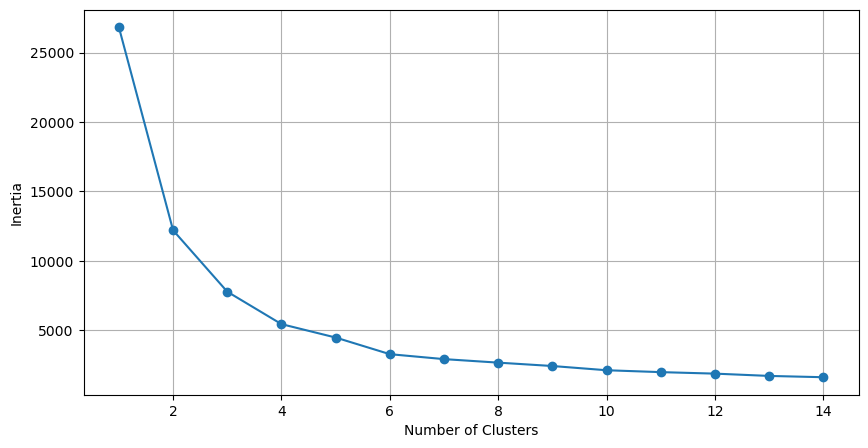

In [ ]:
import matplotlib.pyplot as plt

# Create function to work out optimum number of clusters (elbow method)
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)
    plt.show()

# Get indices for the columns of interest
colnames = Skubal_Features_only.columns
idx_release_speed = colnames.index('release_speed')
idx_release_spin_rate = colnames.index('release_spin_rate')

# Select only those columns from the transformed array
selected_features = Skubal_Features_Transformed[:, [idx_release_speed, idx_release_spin_rate]]

# Remove rows with NaN values
import numpy as np
selected_features_no_nan = selected_features[~np.isnan(selected_features).any(axis=1)]

optimise_k_means(selected_features_no_nan, 15)

### Fit the KMeans to Data

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(selected_features_no_nan)
kmeans.labels_
labels = kmeans.labels_
labels

array([1, 2, 2, ..., 2, 2, 2], shape=(13414,), dtype=int32)

### PCA Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
# Scale values between 0 and 1
scaled_data = preprocessing.scale(Skubal_Features_only)